<a href="https://colab.research.google.com/github/charmdust/LLMs-senolytics/blob/main/PCA_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload csv file of senolytics dataset #embeddings_ChemBERTa-77M-MTR.csv
from google.colab import files

uploaded_files = files.upload()

Saving embeddings_ChemBERTa-77M-MTR.csv to embeddings_ChemBERTa-77M-MTR.csv


In [ ]:
import pandas as pd

In [ ]:
# Senolytic embedding dataset
embeddings_df = pd.read_csv('embeddings_ChemBERTa-77M-MTR.csv', index_col=0)
embeddings_unlabelled_df= embeddings_df.drop(['senolytic'], axis=1)

In [ ]:
embeddings_unlabelled_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.290031,0.263885,-0.066671,0.100327,-0.259569,0.022748,0.140864,0.243493,0.567811,0.118618,...,0.252246,-0.237621,0.464819,0.230708,0.672948,0.419122,-0.358063,-0.216196,-0.069715,-0.678289
1,-0.012639,0.213503,-0.134192,0.392547,0.022338,-0.086408,-0.035086,0.005343,0.619932,0.673573,...,-0.170875,-0.184574,0.427398,0.281019,0.306216,-0.392882,0.011277,-0.131439,-0.803637,-0.826964
2,-0.095006,0.644539,-0.066614,-0.268834,-0.206784,0.095967,0.055044,0.056933,0.307201,0.020258,...,-0.307819,-0.593354,0.454562,-0.237803,0.814712,0.062407,-0.265970,-0.249852,-0.228299,-0.416776
3,0.026083,0.318502,0.013914,0.172785,0.111354,0.511077,0.080710,0.520043,0.804374,0.651797,...,0.248897,0.402831,0.576898,0.511677,0.750589,0.018256,-0.694583,-0.071945,-0.761183,-0.756916
4,-0.460030,0.421303,-0.162309,0.028112,0.387106,-0.287026,0.056716,0.360014,0.328866,1.121849,...,0.191067,0.192859,0.277388,-0.047801,0.186759,0.439925,-1.476240,-0.124936,0.020092,0.159189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,-0.295840,0.303825,-0.136295,-0.366104,0.202789,-0.212097,-0.128841,0.362939,0.497204,0.649837,...,-0.062955,-0.157866,0.413815,-0.354008,0.722578,0.321399,0.043701,-0.206395,-0.436977,-0.842718
2519,-0.283768,0.370120,-0.110231,0.512154,0.233257,0.242050,-0.017050,0.329926,1.005854,0.521571,...,0.547734,-0.104136,0.552833,0.152982,0.785510,0.187130,-0.635683,-0.121113,-0.242070,-0.921150
2520,0.040798,0.458825,-0.366712,0.276873,0.680884,-0.451345,0.026750,0.578484,0.377602,-0.237474,...,0.565088,-0.183758,0.269405,0.014521,0.020281,0.076221,-0.285806,0.119852,-0.045421,-1.112874
2521,-0.046136,0.064962,-0.046859,0.374524,0.312591,-0.085187,0.275788,-0.065989,0.277828,0.562855,...,0.701727,-0.350442,0.424701,0.048650,0.542230,0.177762,-0.557880,0.414519,-0.289631,-0.846267


## PCA

In [ ]:
# Scale dataset https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_embeddings_df = std_scaler.fit_transform(embeddings_unlabelled_df)

In [ ]:
scaled_embeddings_df

array([[-0.40092182, -0.01088595,  0.16195741, ..., -0.59164049,
         1.39080996,  0.07436137],
       [ 0.9607636 , -0.17080164, -0.86093701, ..., -0.17931584,
        -1.10334539, -0.59395979],
       [ 0.55643157,  1.19733265,  0.16281985, ..., -0.75537045,
         0.85188128,  1.24990879],
       ...,
       [ 1.22307903,  0.60786455, -4.3834327 , ...,  1.04317136,
         1.47337228, -1.87917626],
       [ 0.79633095, -0.6422804 ,  0.46210394, ...,  2.47667495,
         0.64345018, -0.68073116],
       [-0.65030348, -0.73416951, -0.25105294, ...,  1.67789607,
         0.1457734 , -0.72823335]])

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=6)
pca.fit(scaled_embeddings_df)
print(pca.explained_variance_ratio_)


[0.19784905 0.10650279 0.07463944 0.06021996 0.0386067  0.03240106]


In [ ]:
pca.explained_variance_ratio_.sum()

0.5102189968811102

In [ ]:
# How many to explain 95% of variance?
pca = PCA(n_components=len(scaled_embeddings_df[0]))
pca.fit(scaled_embeddings_df)
print(pca.explained_variance_ratio_)


[1.97849054e-01 1.06502787e-01 7.46394434e-02 6.02199554e-02
 3.86067005e-02 3.24010728e-02 3.14279970e-02 2.94632597e-02
 2.52303959e-02 2.12486635e-02 2.00801965e-02 1.74194333e-02
 1.57710492e-02 1.43729412e-02 1.27266319e-02 1.14364108e-02
 1.09035731e-02 1.03738602e-02 1.00752941e-02 9.52632944e-03
 8.93648120e-03 8.23000209e-03 7.62657655e-03 7.18250527e-03
 6.84993667e-03 6.60586016e-03 6.36705559e-03 5.99882002e-03
 5.73207037e-03 5.25234192e-03 5.15618151e-03 5.03125021e-03
 4.88765066e-03 4.64281078e-03 4.58704370e-03 4.36810732e-03
 4.24783230e-03 4.05052090e-03 3.99858423e-03 3.82510014e-03
 3.70072323e-03 3.46963250e-03 3.39552462e-03 3.35107662e-03
 3.31044305e-03 3.09667484e-03 3.01588525e-03 2.84729900e-03
 2.83089702e-03 2.81349780e-03 2.65581632e-03 2.59433791e-03
 2.52816463e-03 2.42407372e-03 2.32317050e-03 2.29213290e-03
 2.22670997e-03 2.18962175e-03 2.14331554e-03 2.10626593e-03
 2.00484064e-03 1.98950646e-03 1.93700356e-03 1.83209028e-03
 1.76365360e-03 1.739672

In [ ]:
# 144 of 384 features needed to explain 99% of data
pca.explained_variance_ratio_[0:144].sum()

0.9901830685236713

In [ ]:
# 80 of 384 features needed to explain 95% of data
pca.explained_variance_ratio_[0:80].sum()

0.9505580657220372

In [ ]:
# 52 of 384 features needed to explain 90% of data
pca.explained_variance_ratio_[0:52].sum()

0.9009335895164144

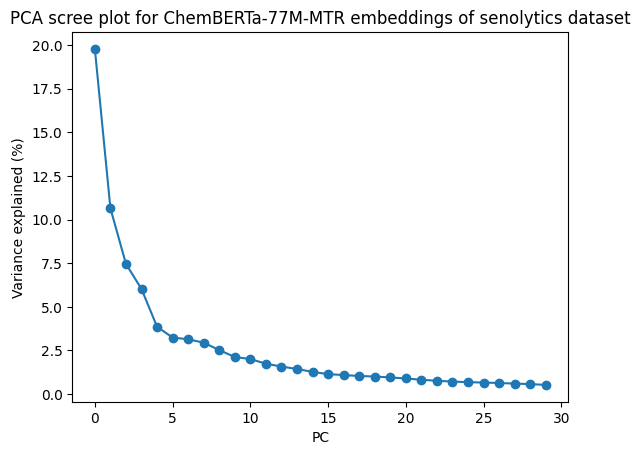

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_[0:30]*100,  marker='o')
plt.title("PCA scree plot for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC")
plt.ylabel("Variance explained (%)")
plt.show()

In [ ]:
# left of elbow: 4 of 384 features explains this amount of data (elbow)
pca.explained_variance_ratio_[0:4].sum()

0.439211240634701

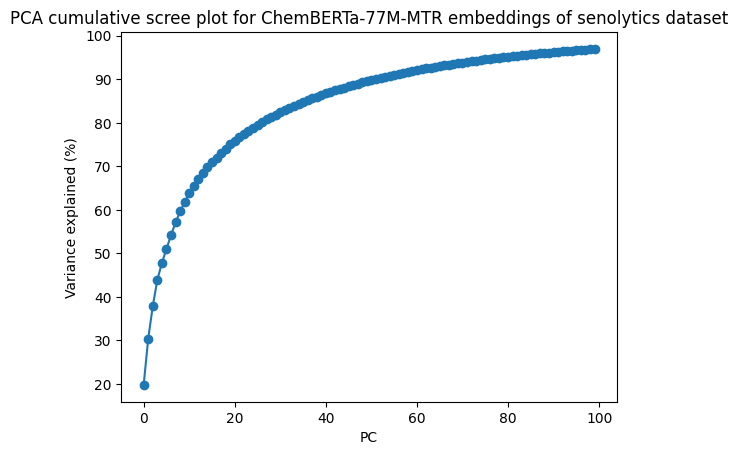

In [ ]:
# Cumulative plot
variance = np.cumsum(pca.explained_variance_ratio_)
# https://statisticallyrelevant.com/principal-component-analysis-in-python/

plt.plot(variance[0:100]*100,  marker='o')
plt.title("PCA cumulative scree plot for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC")
plt.ylabel("Variance explained (%)")
plt.show()

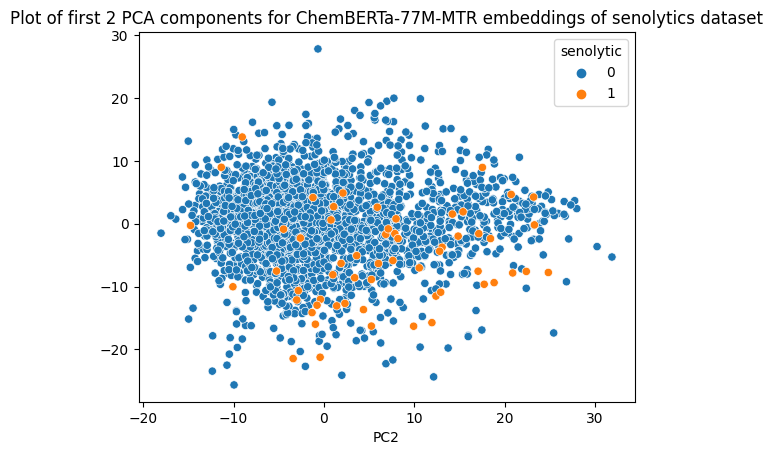

In [ ]:
# Plot data
import seaborn as sns
pca = PCA(n_components=2)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)


sns.scatterplot(x=pca_transformed_embeddings[:,0], y=pca_transformed_embeddings[:,1], hue=embeddings_df['senolytic'])

#plt.scatter(pca_transformed_embeddings[:,0], pca_transformed_embeddings[:,1])
plt.title("Plot of first 2 PCA components for ChemBERTa-77M-MTR embeddings of senolytics dataset")
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

In [ ]:
# Choose 52 to explain 90% variance
pca = PCA(n_components=52)
pca.fit(scaled_embeddings_df)
pca_transformed_embeddings = pca.transform(scaled_embeddings_df)
pca_transformed_embeddings

array([[  4.18448074,   6.70183444,   3.97279092, ...,  -0.42130614,
         -0.45737664,  -0.215192  ],
       [  2.68712471,   3.98162858,   0.30938865, ...,   1.17535669,
          0.70977673,   0.37867127],
       [  1.65507412,  15.13123803,   1.93179756, ...,   0.63013056,
          0.693397  ,   0.30150692],
       ...,
       [ 20.88445995,  -7.83010165, -13.57615875, ...,  -2.52845734,
         -1.68613783,   2.41567427],
       [ 17.13447879,  -1.57634882,  -8.3962412 , ...,  -0.15474382,
          0.84295977,  -1.45809816],
       [ 14.84866523,  -1.96492954,  -9.34038533, ...,  -2.30182109,
         -0.98783408,  -1.53668933]])

In [ ]:
pca_transformed_embeddings_df = pd.DataFrame(pca_transformed_embeddings)
pca_transformed_embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,4.184481,6.701834,3.972791,-7.931931,1.204368,2.685703,0.415779,1.454484,-1.409162,1.224703,...,-0.182192,0.517955,-0.565866,0.010158,0.896658,0.424820,-1.265472,-0.421306,-0.457377,-0.215192
1,2.687125,3.981629,0.309389,-8.787266,7.461270,0.470253,-2.620183,0.162801,-2.658939,-4.703126,...,-2.773765,-3.269509,-2.406397,-1.536597,0.965217,1.478966,0.620433,1.175357,0.709777,0.378671
2,1.655074,15.131238,1.931798,1.060965,2.790545,-1.830201,2.340536,2.659475,-4.869401,2.860517,...,0.372916,1.019819,-0.833802,0.225208,-0.421733,1.053584,-0.631845,0.630131,0.693397,0.301507
3,1.686809,-7.277621,1.869668,-6.925907,1.518951,1.332903,1.977778,-1.560953,-7.758262,-2.962261,...,-0.335822,0.688395,-0.571124,-0.919215,-1.202824,-0.611707,-0.109249,0.036952,0.247597,1.405690
4,6.699373,-5.107465,10.940938,-0.297832,5.955676,-6.428809,13.952084,-7.900451,7.820023,-0.937135,...,-0.903090,1.386645,-0.194164,-1.412748,-1.389199,-0.155710,-1.404926,-3.407124,3.816752,-0.313709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,8.188425,-2.353043,-7.379499,5.112264,0.793266,-5.841407,-0.420128,1.980038,1.566482,3.444219,...,-0.169433,0.666308,0.672032,0.194354,0.109333,1.343855,-0.479735,-0.163573,1.135850,-1.823640
2519,2.321168,-12.688175,-5.656679,3.607345,-1.658469,2.368440,4.468992,0.489902,-3.856958,-4.770536,...,0.639255,-1.656219,-1.509138,-0.995929,-1.491969,-0.688649,-0.074657,-1.600442,-0.305098,0.852326
2520,20.884460,-7.830102,-13.576159,1.274053,3.416450,-4.702599,6.242463,-1.094841,3.503904,-0.026399,...,0.271118,0.657674,-0.036272,-2.985154,0.824557,0.977563,1.751332,-2.528457,-1.686138,2.415674
2521,17.134479,-1.576349,-8.396241,0.656804,-1.098776,8.493051,0.137253,-6.371421,5.251926,-1.614952,...,0.265390,-2.079084,1.084889,-1.535601,4.326326,0.482047,0.921905,-0.154744,0.842960,-1.458098


In [ ]:
X = pca_transformed_embeddings_df
y = embeddings_df['senolytic']


In [ ]:
# Shuffle dataset
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
y

1356    0
1118    0
1352    0
1176    0
489     0
       ..
1862    0
124     0
2331    0
890     0
264     0
Name: senolytic, Length: 2523, dtype: int64

## Classifiers

### Random Forest

In [ ]:
# Random forest https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# CPSC 330W2 UBC Homework 5: Evaluation metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    cross_val_predict,
)

rf = RandomForestClassifier(max_depth=5, random_state=42, class_weight="balanced")

# cv = 4 should give stratified
scores_rf = cross_validate(rf, X, y, scoring = ["accuracy", "precision", "recall", "f1"], return_train_score=True, cv=4)
pd.DataFrame(scores_rf)



,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.050575,0.030285,0.980983,0.999471,1.0,1.000000,0.142857,0.977273,0.250,0.988506
1,1.349802,0.083121,0.977813,0.996829,1.0,0.974359,0.066667,0.883721,0.125,0.926829
2,0.789545,0.017183,0.977813,0.998414,1.0,1.000000,0.066667,0.930233,0.125,0.963855
3,0.673245,0.017466,0.976190,0.996830,0.0,0.931818,0.000000,0.931818,0.000,0.931818


In [ ]:
pd.DataFrame(scores_rf).mean()

fit_time           0.965792
score_time         0.037014
test_accuracy      0.978200
train_accuracy     0.997886
test_precision     0.750000
train_precision    0.976544
test_recall        0.069048
train_recall       0.930761
test_f1            0.125000
train_f1           0.952752
dtype: float64

In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
# What optimisation scoring? Accuracy and precision both give just 0 for every test example but don't want too many false positives
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline


cross_val = StratifiedKFold(n_splits=4)

pipe_rf = make_pipeline(RandomForestClassifier(random_state=42, class_weight="balanced"))

param_dist = {
    "randomforestclassifier__n_estimators": [1, 10, 50, 100, 1000],
    "randomforestclassifier__criterion": ['gini', 'entropy', 'log_loss'],
    "randomforestclassifier__max_depth": [None, 1, 10, 100],
    "randomforestclassifier__max_features": [None, "log2", "sqrt"],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 5, 10],
}
random_search = RandomizedSearchCV(
    pipe_rf, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search.fit(X, y)
random_search.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'randomforestclassifier__n_estimators': 1000,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__min_samples_leaf': 10,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__criterion': 'log_loss'}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_rf = {}
for key, value in random_search.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_rf[key[len("randomforestclassifier__"):]] = value

best_params_rf

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'log_loss'}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.9762376237623762
Precision: 0.0
Recall: 0.0
F1: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


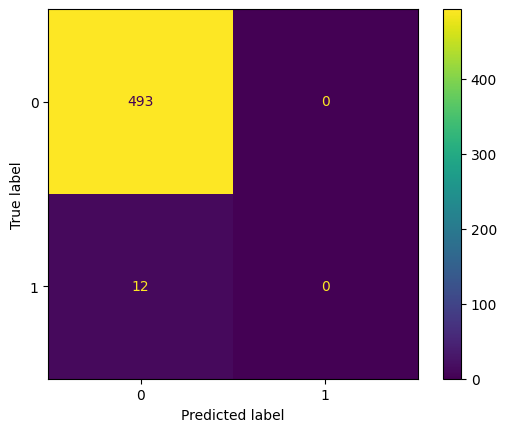

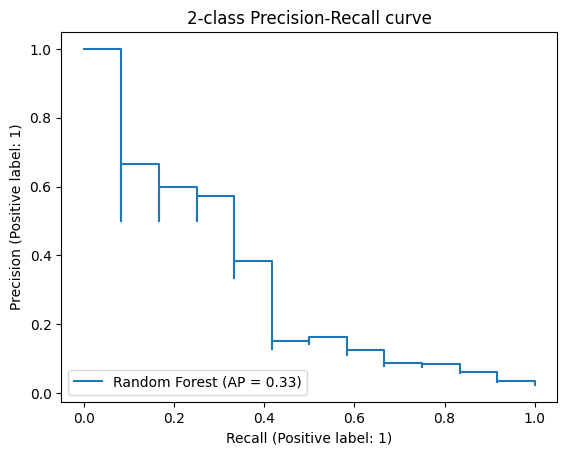

In [ ]:
# Retrain model
# https://medium.com/analytics-vidhya/optimize-hyperparameters-with-gridsearch-d351b0fd339d

rf_best = RandomForestClassifier(random_state=42, class_weight="balanced", **best_params_rf)

rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    rf_best, X_test, y_test, name="Random Forest",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")



In [ ]:
# Dataset imbalance
print("Senolytics " + str(round(sum(y)/len(X)*100, 2)) + "% of the dataset")

Senolytics 2.3% of the dataset


### KNN

In [ ]:
# KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


cross_val = StratifiedKFold(n_splits=4)

pipe_knn = make_pipeline(KNeighborsClassifier())

param_dist = {
    "kneighborsclassifier__n_neighbors": [2, 5, 10],
    "kneighborsclassifier__algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "kneighborsclassifier__weights": ['uniform', 'distance'],
}

random_search_knn = RandomizedSearchCV(
    pipe_knn, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_knn.fit(X, y)
random_search_knn.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'kneighborsclassifier__weights': 'distance',
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__algorithm': 'brute'}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_knn = {}
for key, value in random_search_knn.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_knn[key[len("kneighborsclassifier__"):]] = value

best_params_knn

{'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'brute'}

Accuracy: 0.9821782178217822
Precision: 0.8
Recall: 0.3333333333333333
F1: 0.47058823529411764




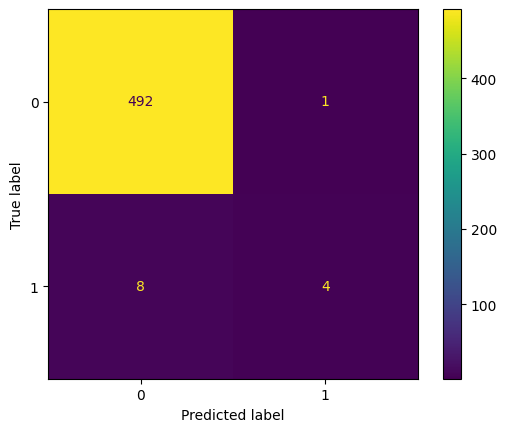

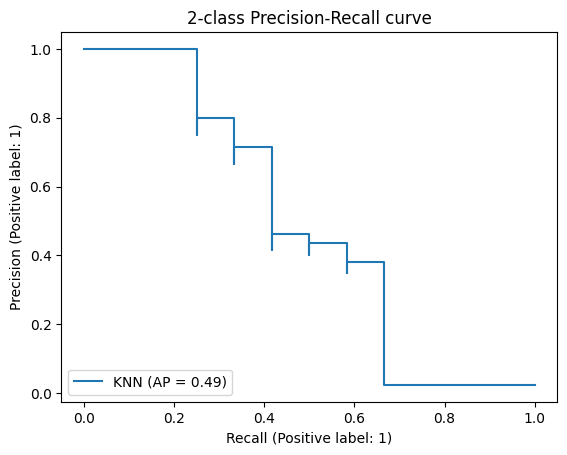

In [ ]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


knn_best = KNeighborsClassifier(**best_params_knn)

knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    knn_best, X_test, y_test, name="KNN",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### SVC

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
from sklearn.svm import SVC

cross_val = StratifiedKFold(n_splits=4)

pipe_svc = make_pipeline(SVC(random_state=42, class_weight='balanced'))

param_dist = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__kernel": ['linear', 'poly', 'rbf',]
}

random_search_svc = RandomizedSearchCV(
    pipe_svc, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_svc.fit(X, y)
random_search_svc.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


{'svc__kernel': 'poly', 'svc__gamma': 1, 'svc__C': 100}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_svc= {}
for key, value in random_search_svc.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_svc[key[len("svc__"):]] = value

best_params_svc

{'kernel': 'poly', 'gamma': 1, 'C': 100}

Accuracy: 0.9564356435643564
Precision: 0.25
Recall: 0.4166666666666667
F1: 0.3125




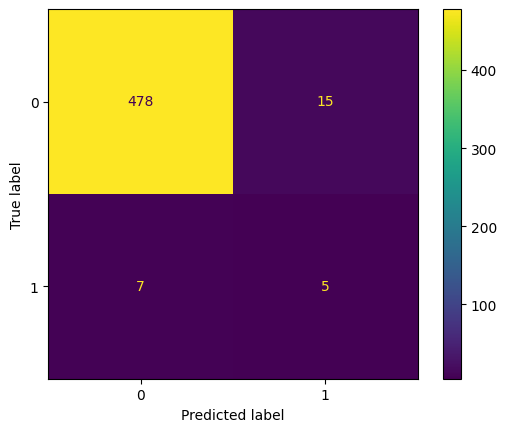

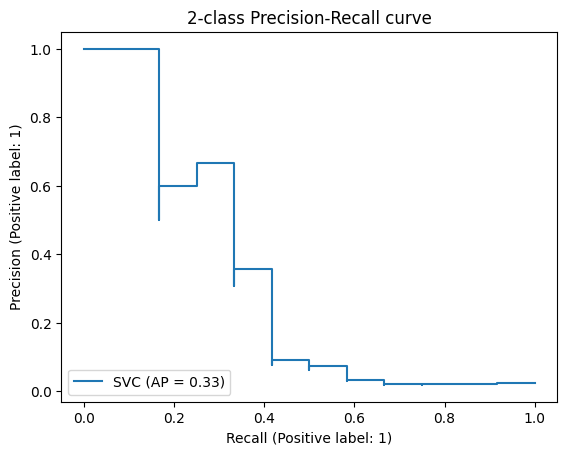

In [ ]:
svc_best = SVC(random_state=42, class_weight='balanced', **best_params_svc)

svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc_best, X_test, y_test, name="SVC",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

### XGBoost

In [ ]:
# Code: Code from paper Senolytics prediction code: https://zenodo.org/record/7870357
# https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73
import xgboost as xgb

cross_val = StratifiedKFold(n_splits=4)

pipe_xgb = make_pipeline(xgb.XGBClassifier(random_state=42, class_weight='balanced'))

param_dist = {
    'xgbclassifier__learning_rate': [0.05, 0.10, 0.3, 0.5, 0.75, 1],
    'xgbclassifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'xgbclassifier__max_depth': [3, 5, 10, 20],
    'xgbclassifier__min_child_weight': [1, 3, 8, 15],
    'xgbclassifier__colsample_bytree': [0.1, 0.5, 0.9]
}

random_search_xgb = RandomizedSearchCV(
    pipe_xgb, param_dist, n_iter=10, verbose=1, n_jobs=-1, random_state=123, scoring = 'f1', cv=cross_val
)
random_search_xgb.fit(X, y)
random_search_xgb.best_params_


Fitting 4 folds for each of 10 candidates, totalling 40 fits
[14:22:36] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



{'xgbclassifier__min_child_weight': 3,
 'xgbclassifier__max_depth': 20,
 'xgbclassifier__learning_rate': 0.3,
 'xgbclassifier__gamma': 0.1,
 'xgbclassifier__colsample_bytree': 0.9}

In [ ]:
# Remove classifier name from best_param dictionary
# https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/
best_params_xgb= {}
for key, value in random_search_xgb.best_params_.items():
  #print(len("randomforestclassifier__"))
  best_params_xgb[key[len("xgbclassifier__"):]] = value

best_params_xgb

{'min_child_weight': 3,
 'max_depth': 20,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

[14:44:36] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Accuracy: 0.9782178217821782
Precision: 1.0
Recall: 0.08333333333333333
F1: 0.15384615384615385




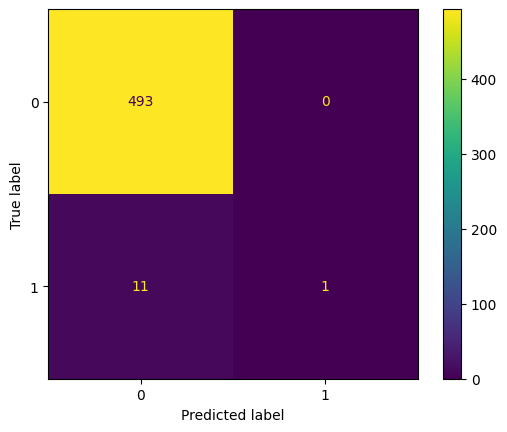

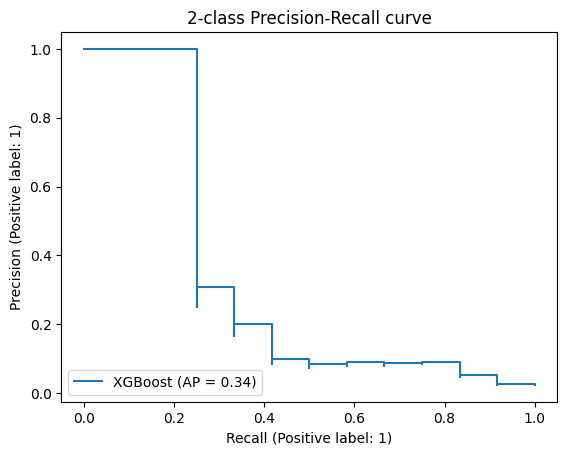

In [ ]:
xgb_best = xgb.XGBClassifier(random_state=42, class_weight='balanced', **best_params_xgb)

xgb_best.fit(X_train, y_train)
y_pred = xgb_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    xgb_best, X_test, y_test, name="XGBoost",
)
_ = display.ax_.set_title("2-class Precision-Recall curve")